In [1]:
import cv2

In [38]:
import numpy as np

In [28]:
def image_process(imgpath):
    img = cv2.imread(imgpath, 0)
    height, width = img.shape[0], img.shape[1]
    scale = 2000/width
    img = cv2.resize(img, (0,0), fx=scale, fy=scale)
    
    # contrast
#     clahe = cv2.createCLAHE(clipLimit=0.5, tileGridSize=(8,8))
#     img = clahe.apply(img)
#     img = cv2.adaptiveThreshold(img,255,cv2.ADAPTIVE_THRESH_MEAN_C, cv2.THRESH_BINARY,11,13)
    

    # Otsu's thresholding after Gaussian filtering
#         img = cv2.GaussianBlur(img,(5,5),0)
#         _, img = cv2.threshold(img,0,255,cv2.THRESH_BINARY+cv2.THRESH_OTSU)

    if imgpath[-4] == '.':
        imgpath = ''.join([imgpath[:-4], '_processed', imgpath[-4:]])
    else:
        imgpath = ''.join([imgpath[:-5], '_processed', imgpath[-5:]])
    cv2.imwrite(imgpath, img)
    return 

In [35]:
image_process('contrast1_enhanced.jpg')

In [23]:
662731339/(2000*1400)

236.68976392857144

In [12]:
filename = 'bloodtest6.jpg'
img = cv2.imread(filename, 0)
# height, width, channel
shape = img.shape
height, width = shape[0], shape[1]
if height < width:
    img_resize = cv2.resize(img, (3840, 2160))
else:
    img_resize = cv2.resize(img, (2160, 3840))

cv2.imwrite('bloodtest6_resize.jpg', img_resize)

True

In [6]:
img.shape[1]

1920

In [22]:
filename = 'bloodtest8.jpg'
img = cv2.imread(filename, 0)
# resize
img_resize = cv2.resize(img, (3840, 2160))
# blur
img_blur = cv2.medianBlur(img_resize,7)
# threshold
img_thres = cv2.adaptiveThreshold(img_blur, 255, cv2.ADAPTIVE_THRESH_MEAN_C, cv2.THRESH_BINARY,9,4)
# invert
# img_thres = cv2.bitwise_not(img_thres)
# save
cv2.imwrite('bloodtest8_cv2_mean_noinv_3840_7_9.jpg', img_thres)

True

In [27]:
img_border=cv2.copyMakeBorder(img_thres, 10,10,10,10, borderType= cv2.BORDER_REFLECT)
cv2.imwrite('bloodtest8_cv2_mean_noinv_3840_7_9_border_reflect_10.jpg', img_border)



True

In [141]:
filename = 'bloodtest8.jpg'
img = cv2.imread(filename, 0)
# resize
img_resize = cv2.resize(img, (3840, 2160))
# blur
# img_blur = cv2.medianBlur(img_resize,5)
# contrast
clahe = cv2.createCLAHE(clipLimit=0.5, tileGridSize=(8,8))
img_con = clahe.apply(img_resize)
# threshold
img_thres = cv2.adaptiveThreshold(img_con, 255, cv2.ADAPTIVE_THRESH_MEAN_C, cv2.THRESH_BINARY,9,3)
# invert
# img_thres = cv2.bitwise_not(img_thres)
# save
cv2.imwrite('bloodtest8_cv2.jpeg', img_thres)

True

In [168]:
filename = 'bloodtest16.jpeg'
img = cv2.imread(filename, 0)
# resize
img_resize = cv2.resize(img, (3840, 2160))
# blur
# img_blur = cv2.medianBlur(img_resize,5)
# contrast
clahe = cv2.createCLAHE(clipLimit=0.5, tileGridSize=(8,8))
img_con = clahe.apply(img_resize)
# threshold
# img_thres = cv2.adaptiveThreshold(img_con, 255, cv2.ADAPTIVE_THRESH_MEAN_C, cv2.THRESH_BINARY,9,15)
# invert
# img_thres = cv2.bitwise_not(img_thres)
# save
cv2.imwrite('before_denoise.jpeg', img_con)

True

In [63]:
ret,thresh1 = cv2.threshold(cl1,20,255,cv2.THRESH_BINARY)

cv2.imwrite('clahe_2_thres.jpg',thresh1)

True

In [166]:
denoise = cv2.fastNlMeansDenoising(img_con, 10) 

In [167]:
cv2.imwrite('denoise.jpg',denoise)

True

In [170]:
img = cv2.imread('bloodtest16.jpeg',0)
equ = cv2.equalizeHist(img)
# res = np.hstack((img,equ)) 
cv2.imwrite('hist.png',equ)

True

<IPython.core.display.Javascript object>


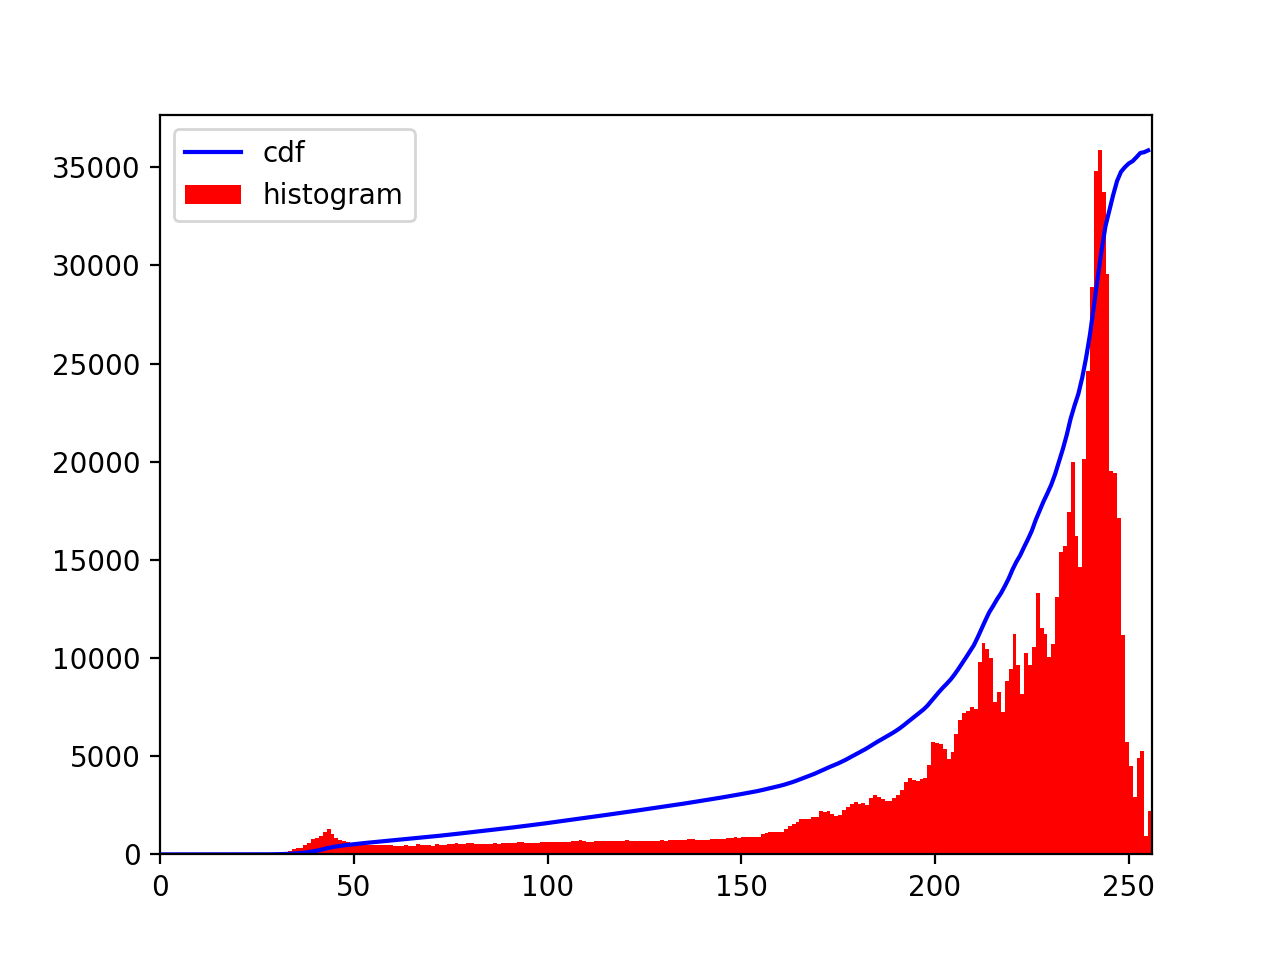

In [172]:
from matplotlib import pyplot as plt
%matplotlib notebook
 
img = cv2.imread('bloodtest16.jpeg',0)
hist,bins = np.histogram(img.flatten(),256,[0,256])
cdf = hist.cumsum()
cdf_normalized = cdf * hist.max()/ cdf.max()
plt.plot(cdf_normalized, color = 'b')
plt.hist(img.flatten(),256,[0,256], color = 'r')
plt.xlim([0,256])
plt.legend(('cdf','histogram'), loc = 'upper left')
plt.show()

<IPython.core.display.Javascript object>


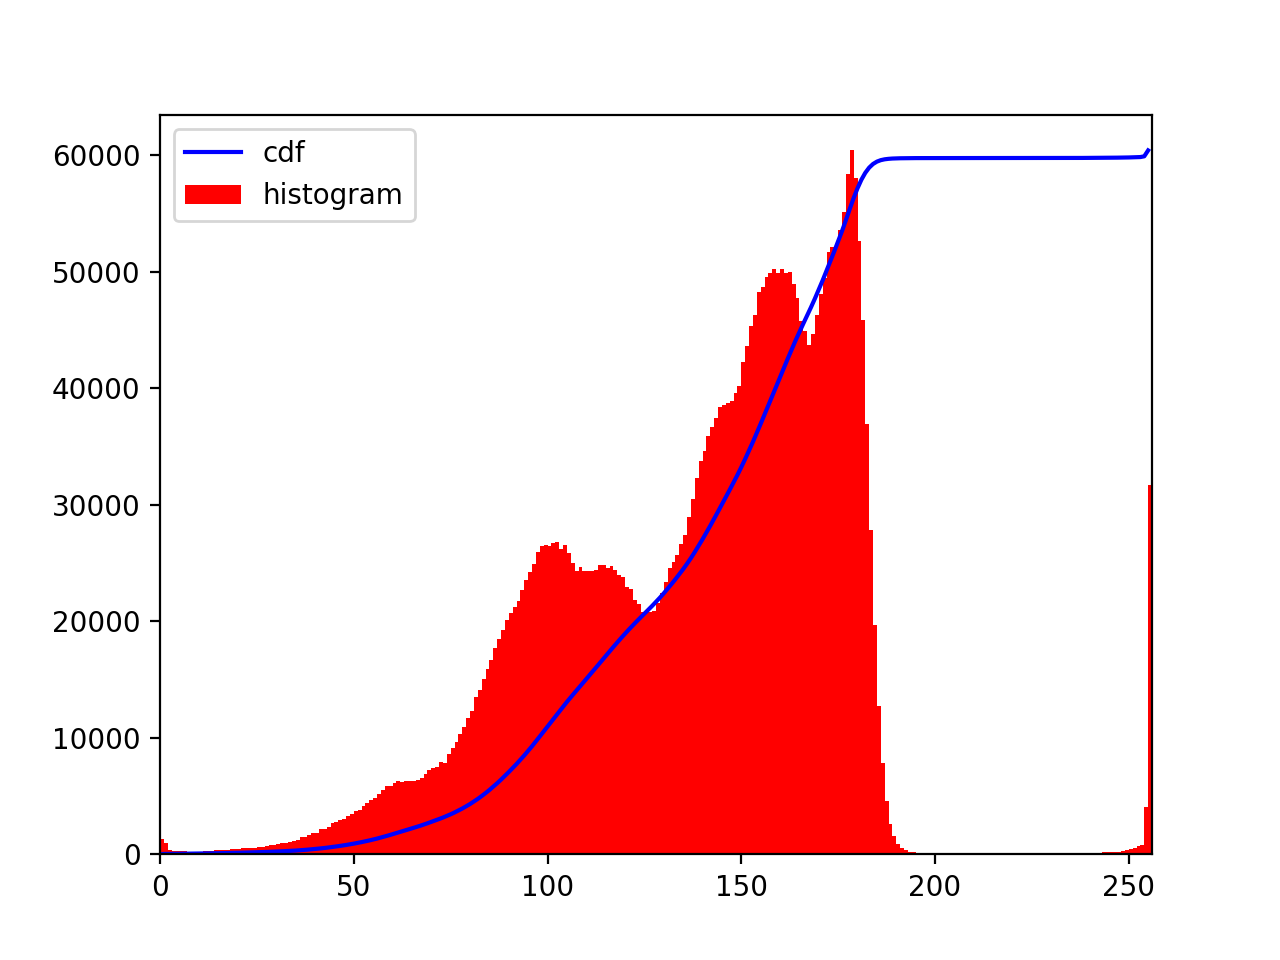

In [173]:
from matplotlib import pyplot as plt
%matplotlib notebook
 
img = cv2.imread('bloodtest8.jpg',0)
hist,bins = np.histogram(img.flatten(),256,[0,256])
cdf = hist.cumsum()
cdf_normalized = cdf * hist.max()/ cdf.max()
plt.plot(cdf_normalized, color = 'b')
plt.hist(img.flatten(),256,[0,256], color = 'r')
plt.xlim([0,256])
plt.legend(('cdf','histogram'), loc = 'upper left')
plt.show()

<IPython.core.display.Javascript object>


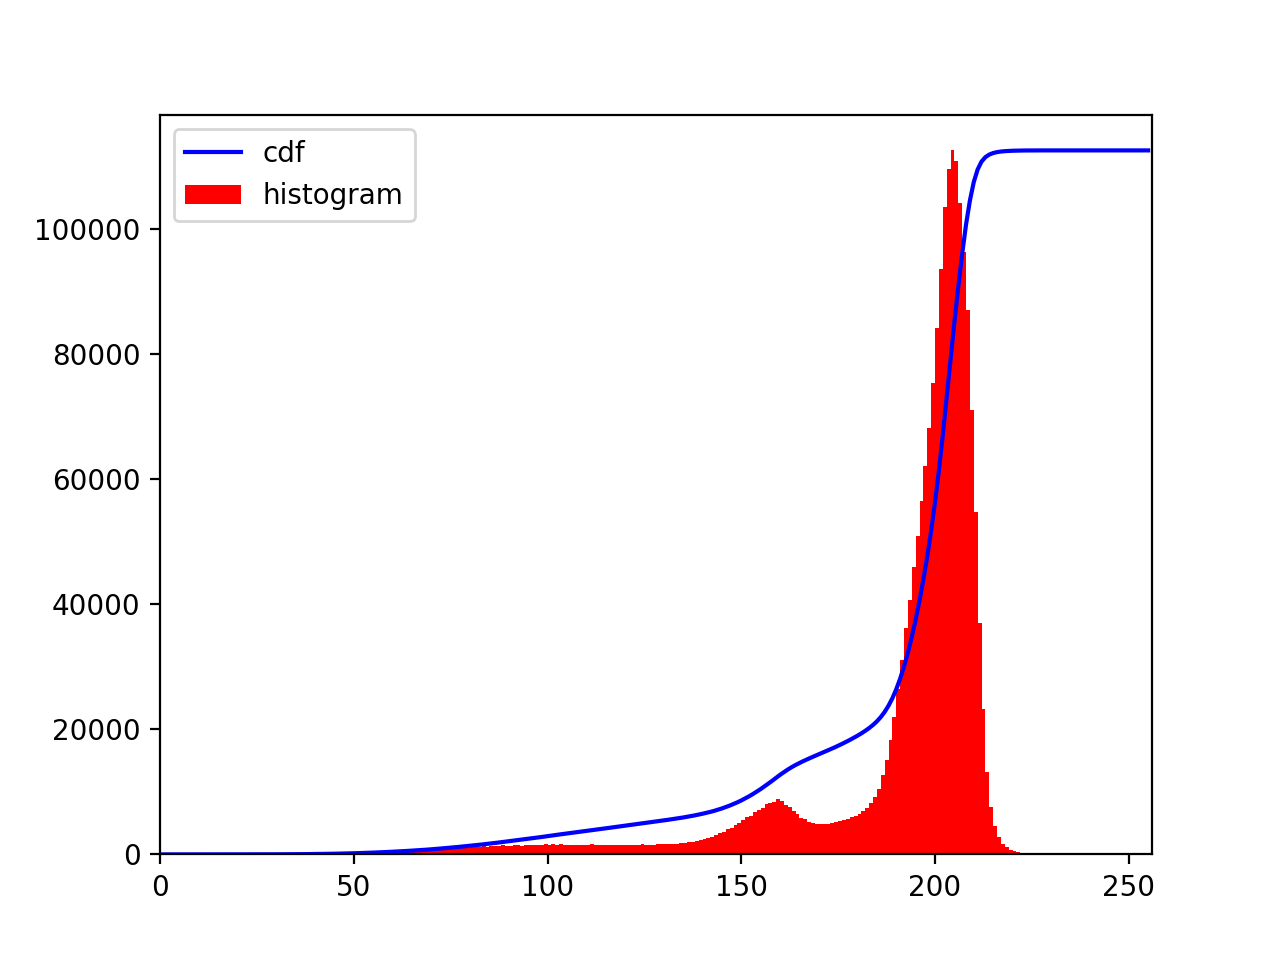

In [174]:
from matplotlib import pyplot as plt
%matplotlib notebook
 
img = cv2.imread('bloodtest.jpg',0)
hist,bins = np.histogram(img.flatten(),256,[0,256])
cdf = hist.cumsum()
cdf_normalized = cdf * hist.max()/ cdf.max()
plt.plot(cdf_normalized, color = 'b')
plt.hist(img.flatten(),256,[0,256], color = 'r')
plt.xlim([0,256])
plt.legend(('cdf','histogram'), loc = 'upper left')
plt.show()